In [105]:
import numpy as np
from scipy.optimize import curve_fit

In [106]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

## Time by Rate $(200<z<300)$

### Extracting

In [107]:
def extract(filepath):
    with open(filepath) as f:
        lines = f.readlines()
    xs = []
    ys = []
    for i in range(len(lines)):
        line = lines[i]
        chunk = line.split(' ')
        if chunk[0] == 'Testing':
            x = float(chunk[4])
            sumy = 0
            j = i + 1
            while j < len(lines):
                subline = lines[j]
                subchunk = subline.split(' ')
                if subchunk[0] == 'Interpolation':
                    sumy += float(subchunk[3])
                    j += 1
                else:
                    break
            y = sumy / (j - i - 1)
            xs.append(x)
            ys.append(y)
    return np.array(xs), np.array(ys)

In [108]:
rates_kraken, rates_time_kraken = extract('rates_time_kraken.txt')

In [109]:
rates_lakota, rates_time_lakota = extract('rates_time_lakota.txt')

In [110]:
rates_chiron, rates_time_chiron = extract('rates_time_chiron.txt')

In [111]:
rates_cluster, rates_time_cluster = extract('rates_time_cluster.txt')

### Plotting

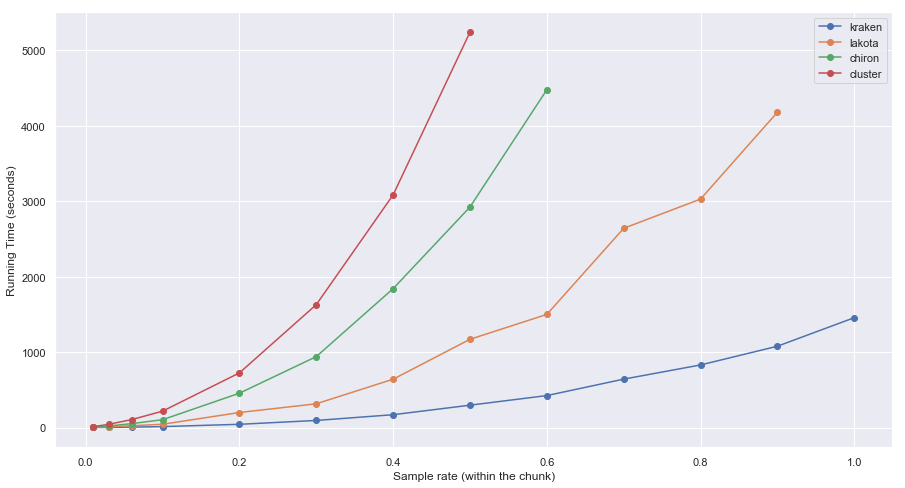

In [112]:
plt.figure(figsize=(15,8))
plt.plot(rates_kraken, rates_time_kraken, marker='o', label='kraken')
plt.plot(rates_lakota, rates_time_lakota, marker='o', label='lakota')
plt.plot(rates_chiron, rates_time_chiron, marker='o', label='chiron')
plt.plot(rates_cluster, rates_time_cluster, marker='o', label='cluster')

# plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.xlabel('Sample rate (within the chunk)')
plt.ylabel('Running Time (seconds)')
plt.legend()
plt.show()

### Curve Fitting

In [113]:
# logarithmic exp_function
def exp_func(x, a, b, c):
    return a * np.exp(b * x) + c

In [117]:
def fitting_rates(x, y):
    popt, pcov = curve_fit(exp_func, x, y, p0=(1, 1e-5, 1))
    fitx = np.arange(0, 1, 0.01)
    fity = exp_func(fitx, *popt)
    return fitx, fity

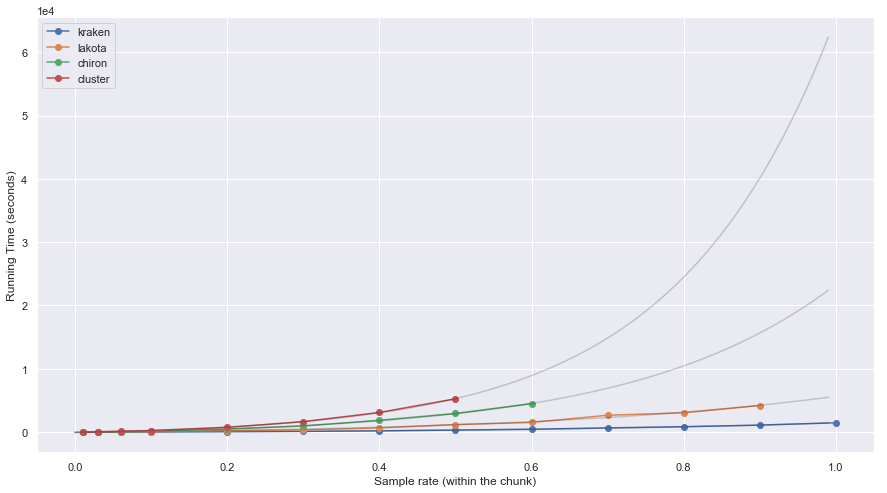

In [115]:
plt.figure(figsize=(15,8))
plt.plot(rates_kraken, rates_time_kraken, marker='o', label='kraken')
plt.plot(*fitting_rates(rates_kraken, rates_time_kraken), c='k', alpha=0.2)
plt.plot(rates_lakota, rates_time_lakota, marker='o', label='lakota')
plt.plot(*fitting_rates(rates_lakota, rates_time_lakota), c='k', alpha=0.2)
plt.plot(rates_chiron, rates_time_chiron, marker='o', label='chiron')
plt.plot(*fitting_rates(rates_chiron, rates_time_chiron), c='k', alpha=0.2)
plt.plot(rates_cluster, rates_time_cluster, marker='o', label='cluster')
plt.plot(*fitting_rates(rates_cluster, rates_time_cluster), c='k', alpha=0.2)

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.xlabel('Sample rate (within the chunk)')
plt.ylabel('Running Time (seconds)')
plt.legend()
plt.show()

### Logarithm Curve Fitting

In [12]:
# logarithmic exp_function
def linear_func(x, a, b):
    return a * x + b

In [13]:
def fitting_rates(x, y):
    popt, pcov = curve_fit(linear_func, x, y, p0=(1, 1))
    fitx = np.arange(0, 1, 0.01)
    fity = linear_func(fitx, *popt)
    return fitx, fity

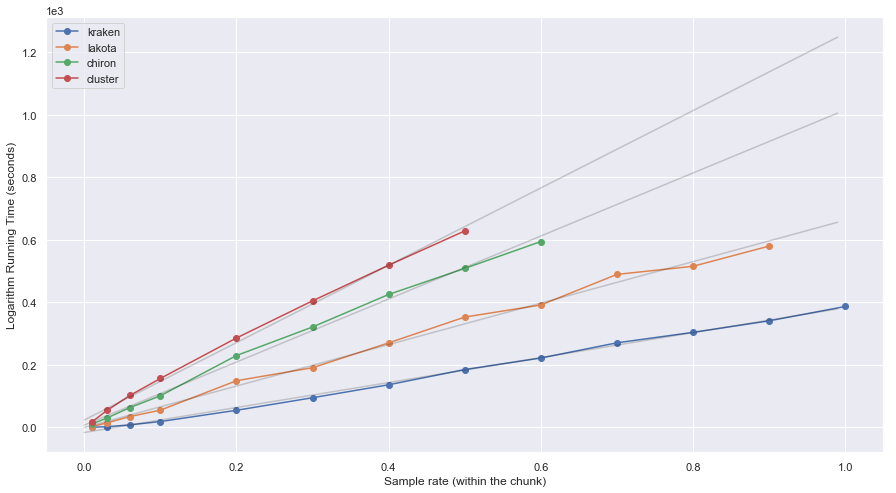

In [14]:
plt.figure(figsize=(15,8))
plt.plot(rates_kraken, np.log(rates_time_kraken)**3, marker='o', label='kraken')
plt.plot(*fitting_rates(rates_kraken, np.log(rates_time_kraken)**3), c='k', alpha=0.2)
plt.plot(rates_lakota, np.log(rates_time_lakota)**3, marker='o', label='lakota')
plt.plot(*fitting_rates(rates_lakota, np.log(rates_time_lakota)**3), c='k', alpha=0.2)
plt.plot(rates_chiron, np.log(rates_time_chiron)**3, marker='o', label='chiron')
plt.plot(*fitting_rates(rates_chiron, np.log(rates_time_chiron)**3), c='k', alpha=0.2)
plt.plot(rates_cluster, np.log(rates_time_cluster)**3, marker='o', label='cluster')
plt.plot(*fitting_rates(rates_cluster, np.log(rates_time_cluster)**3), c='k', alpha=0.2)

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.xlabel('Sample rate (within the chunk)')
plt.ylabel('Logarithm Running Time (seconds)')
plt.legend()
plt.show()

### Corrected Curve Fitting

In [15]:
# logarithmic exp_function
def correct_func(x, a, b, c):
    return a * np.exp((b * x) ** (1/3)) + c

In [16]:
def fitting_rates(x, y):
    popt, pcov = curve_fit(correct_func, x, y, p0=(1, 1e-3, 1))
    fitx = np.arange(0, 1, 0.01)
    fity = correct_func(fitx, *popt)
    return fitx, fity

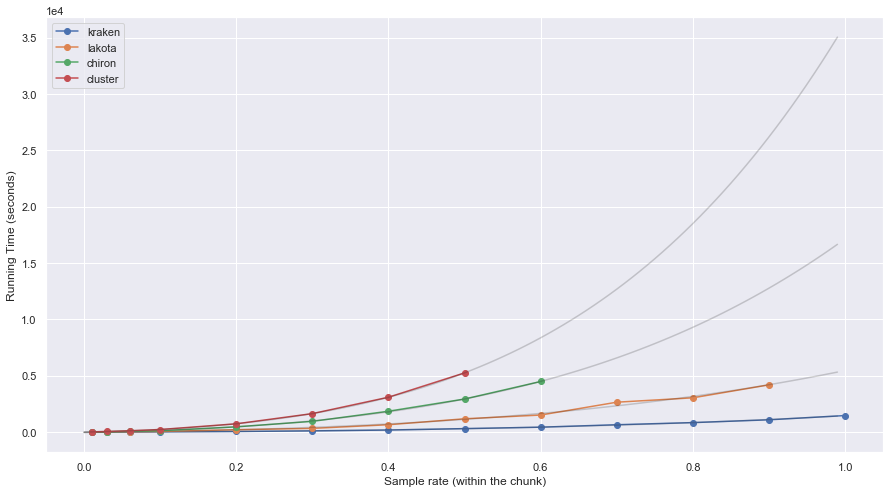

In [17]:
plt.figure(figsize=(15,8))
plt.plot(rates_kraken, rates_time_kraken, marker='o', label='kraken')
plt.plot(*fitting_rates(rates_kraken, rates_time_kraken), c='k', alpha=0.2)
plt.plot(rates_lakota, rates_time_lakota, marker='o', label='lakota')
plt.plot(*fitting_rates(rates_lakota, rates_time_lakota), c='k', alpha=0.2)
plt.plot(rates_chiron, rates_time_chiron, marker='o', label='chiron')
plt.plot(*fitting_rates(rates_chiron, rates_time_chiron), c='k', alpha=0.2)
plt.plot(rates_cluster, rates_time_cluster, marker='o', label='cluster')
plt.plot(*fitting_rates(rates_cluster, rates_time_cluster), c='k', alpha=0.2)

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.xlabel('Sample rate (within the chunk)')
plt.ylabel('Running Time (seconds)')
plt.legend()
plt.show()

## Time by Chunk $(rate=1)$

### Extracting

In [64]:
def extract2(filepath):
    with open(filepath) as f:
        lines = f.readlines()
    xs = []
    ys = []
    for i in range(len(lines)):
        line = lines[i]
        chunk = line.split(' ')
        if chunk[0] == 'Testing':
            x = float(chunk[4]) / 2433528
            sumy = 0
            j = i + 1
            while j < len(lines):
                subline = lines[j]
                subchunk = subline.split(' ')
                if subchunk[0] == 'Interpolation':
                    sumy += float(subchunk[3])
                    j += 1
                else:
                    break
            y = sumy / (j - i - 1)
            xs.append(x)
            ys.append(y)
    return np.array(xs), np.array(ys)/3600

In [65]:
sizes_kraken1, sizes_time_kraken1 = extract2('sizes_time_kraken.txt')

In [66]:
sizes_kraken2, sizes_time_kraken2 = extract2('sizes_time_kraken2.txt')

In [67]:
sizes_kraken = np.concatenate((sizes_kraken1, sizes_kraken2))
sizes_kraken

array([4.10926030e-04, 1.23277809e-03, 2.46555618e-03, 4.10926030e-03,
       1.23277809e-02, 2.46555618e-02, 4.10926030e-02, 8.21852060e-02,
       1.23277809e-01, 1.64370412e-01, 2.05463015e-01, 2.46555618e-01,
       2.87648221e-01, 3.28740824e-01, 3.69833427e-01, 4.10926030e-01,
       5.00000000e-01])

In [68]:
sizes_time_kraken = np.concatenate((sizes_time_kraken1, sizes_time_kraken2))
sizes_time_kraken

array([1.51111111e-04, 1.90000000e-04, 3.57500000e-04, 6.56111111e-04,
       5.80027778e-03, 2.58047222e-02, 7.48416667e-02, 3.43168056e-01,
       8.36695833e-01, 1.62554306e+00, 2.54385417e+00, 3.65469861e+00,
       4.94490278e+00, 7.02033056e+00, 1.41443056e+01, 2.59130167e+01,
       4.41306167e+01])

In [69]:
sizes_lakota, sizes_time_lakota = extract2('sizes_time_lakota.txt')

In [70]:
sizes_chiron, sizes_time_chiron = extract2('sizes_time_chiron.txt')

In [71]:
sizes_cluster, sizes_time_cluster = extract2('sizes_time_cluster.txt')

### Plotting

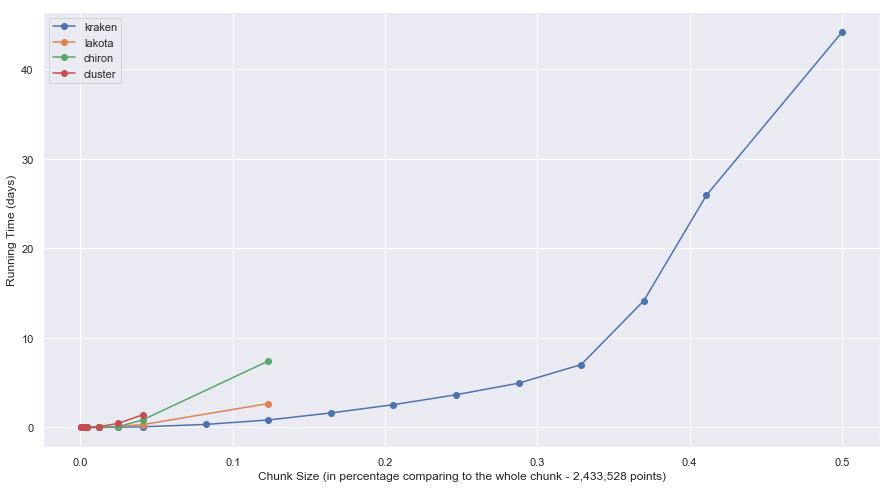

In [72]:
plt.figure(figsize=(15,8))
plt.plot(sizes_kraken, sizes_time_kraken, marker='o', label='kraken')
plt.plot(sizes_lakota, sizes_time_lakota, marker='o', label='lakota')
plt.plot(sizes_chiron, sizes_time_chiron, marker='o', label='chiron')
plt.plot(sizes_cluster, sizes_time_cluster, marker='o', label='cluster')

# plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.xlabel('Chunk Size (in percentage comparing to the whole chunk - 2,433,528 points)')
plt.ylabel('Running Time (days)')
plt.legend()
plt.show()

### Curve Fitting

In [73]:
# logarithmic exp_function
def exp_func(x, a, b, c):
    return a * np.exp(b * x) + c

In [85]:
def fitting_sizes(x, y):
    popt, pcov = curve_fit(exp_func, x, y, p0=(1, 1, 1))
    fitx = np.arange(0, 1, 0.001)
    fity = exp_func(fitx, *popt)
    return fitx, fity

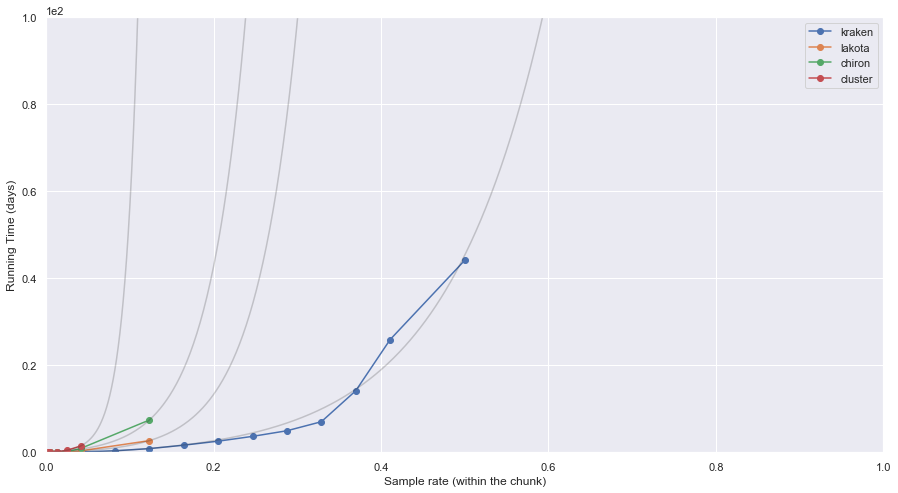

In [86]:
plt.figure(figsize=(15,8))
plt.plot(sizes_kraken, sizes_time_kraken, marker='o', label='kraken')
plt.plot(*fitting_sizes(sizes_kraken, sizes_time_kraken), c='k', alpha=0.2)
plt.plot(sizes_lakota, sizes_time_lakota, marker='o', label='lakota')
plt.plot(*fitting_sizes(sizes_lakota, sizes_time_lakota), c='k', alpha=0.2)
plt.plot(sizes_chiron, sizes_time_chiron, marker='o', label='chiron')
plt.plot(*fitting_sizes(sizes_chiron, sizes_time_chiron), c='k', alpha=0.2)
plt.plot(sizes_cluster, sizes_time_cluster, marker='o', label='cluster')
plt.plot(*fitting_sizes(sizes_cluster, sizes_time_cluster), c='k', alpha=0.2)

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.xlabel('Sample rate (within the chunk)')
plt.ylabel('Running Time (days)')
plt.xlim([0,1])
plt.ylim([0,100])
plt.legend()
plt.show()

### Logarithm Curve Fitting

In [102]:
# logarithmic exp_function
def linear_func(x, a, b):
    return a * np.log(x**3) + b

In [103]:
def fitting_sizes(x, y):
    popt, pcov = curve_fit(linear_func, x, y, p0=(1, 1))
    fitx = np.arange(0, 1, 0.01)
    fity = linear_func(fitx, *popt)
    return fitx, fity

/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


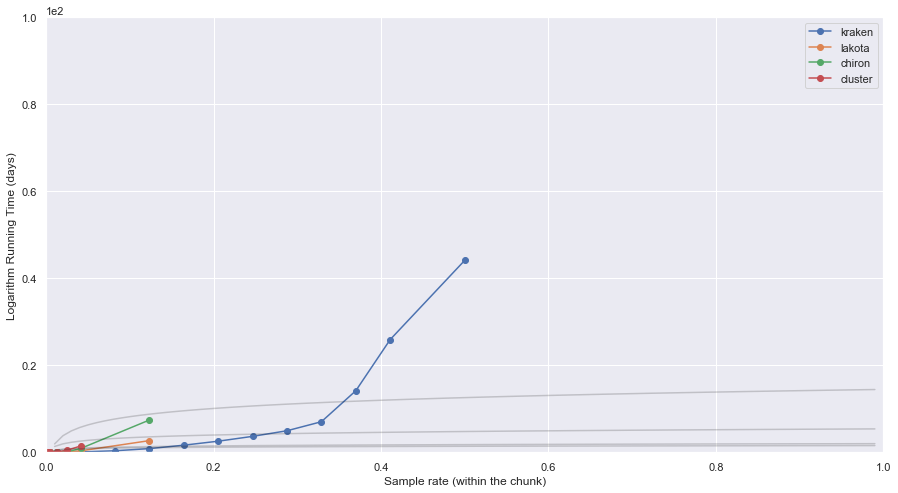

In [104]:
plt.figure(figsize=(15,8))
plt.plot(sizes_kraken, sizes_time_kraken, marker='o', label='kraken')
plt.plot(*fitting_sizes(sizes_kraken, sizes_time_kraken), c='k', alpha=0.2)
plt.plot(sizes_lakota, sizes_time_lakota, marker='o', label='lakota')
plt.plot(*fitting_sizes(sizes_lakota, sizes_time_lakota), c='k', alpha=0.2)
plt.plot(sizes_chiron, sizes_time_chiron, marker='o', label='chiron')
plt.plot(*fitting_sizes(sizes_chiron, sizes_time_chiron), c='k', alpha=0.2)
plt.plot(sizes_cluster, sizes_time_cluster, marker='o', label='cluster')
plt.plot(*fitting_sizes(sizes_cluster, sizes_time_cluster), c='k', alpha=0.2)

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.xlabel('Sample rate (within the chunk)')
plt.ylabel('Logarithm Running Time (days)')
plt.ylim([0,100])
plt.xlim([0,1])
plt.legend()
plt.show()

### Corrected Curve Fitting

In [37]:
# logarithmic exp_function
def corrected_func(x, a, b, c):
    return a * np.exp((b * x)**(1/3)) + c

In [38]:
def fitting_sizes(x, y):
    popt, pcov = curve_fit(corrected_func, x, y, p0=(1, 1e-4, 1))
    fitx = np.arange(0, 1, 0.001)
    fity = corrected_func(fitx, *popt)
    return fitx, fity

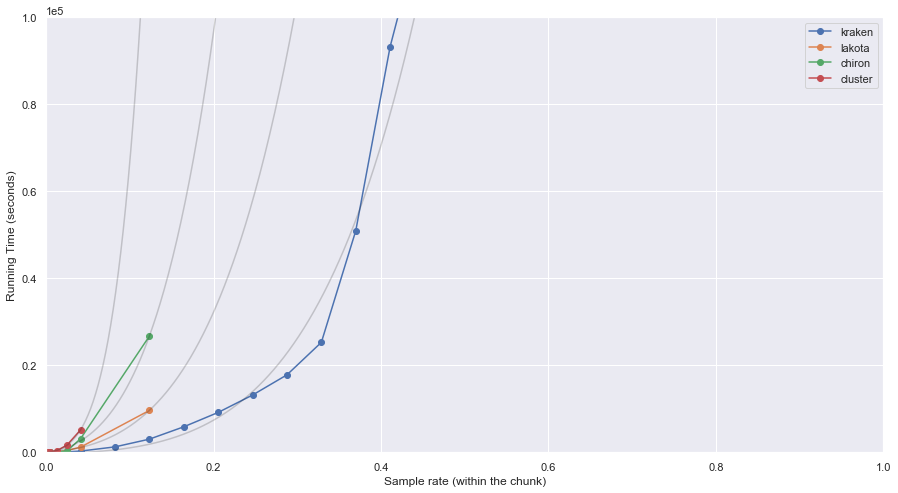

In [39]:
plt.figure(figsize=(15,8))
plt.plot(sizes_kraken, sizes_time_kraken, marker='o', label='kraken')
plt.plot(*fitting_sizes(sizes_kraken, sizes_time_kraken), c='k', alpha=0.2)
plt.plot(sizes_lakota, sizes_time_lakota, marker='o', label='lakota')
plt.plot(*fitting_sizes(sizes_lakota, sizes_time_lakota), c='k', alpha=0.2)
plt.plot(sizes_chiron, sizes_time_chiron, marker='o', label='chiron')
plt.plot(*fitting_sizes(sizes_chiron, sizes_time_chiron), c='k', alpha=0.2)
plt.plot(sizes_cluster, sizes_time_cluster, marker='o', label='cluster')
plt.plot(*fitting_sizes(sizes_cluster, sizes_time_cluster), c='k', alpha=0.2)

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.xlabel('Sample rate (within the chunk)')
plt.ylabel('Running Time (seconds)')
plt.xlim([0,1])
plt.ylim([0,1e5])
plt.legend()
plt.show()

## Prediction for Kraken - Hypothesis of Exponential

In [40]:
def predict(x, y, n):
    popt, pcov = curve_fit(exp_func, x, y, p0=(1, 1e-3, 1))
    return exp_func(n, *popt)

With $1\% \ (24,335)$ points, the interpolation will take -1224 seconds.

In [41]:
predict(sizes_kraken, sizes_time_kraken, 0.01)

-1223.9232982840117

With $10\% \ (243,353)$ points, the interpolation will take 0.52 hours.

In [42]:
predict(sizes_kraken, sizes_time_kraken, 0.1) / 3600

0.5209495521038968

With $20\% \ (486,706)$ points, the interpolation will take 2.65 hours.

In [43]:
predict(sizes_kraken, sizes_time_kraken, 0.2) / 3600

2.653123185115611

With $50\% \ (1,216,764)$ points, the interpolation will take 1.89 days.

In [44]:
predict(sizes_kraken, sizes_time_kraken, 0.5) / 3600 / 24

1.8879071479749499

For the whole data cube $(2,433,528)$ points, the interpolation will take 127.59 days.

In [46]:
predict(sizes_kraken, sizes_time_kraken, 1) / 3600 / 24

127.58763515913434

## Prediction for Kraken - Hypothesis of Cube-root Exponential

In [47]:
def predict(x, y, n):
    popt, pcov = curve_fit(corrected_func, x, y, p0=(1, 1e-3, 1))
    return corrected_func(n, *popt)

With $1\% \ (24,335)$ points, the interpolation will take -266.51 seconds.

In [54]:
predict(sizes_kraken, sizes_time_kraken, 0.01)

-266.5138319725956

With $10\% \ (243,353)$ points, the interpolation will take 0.28 hours.

In [49]:
predict(sizes_kraken, sizes_time_kraken, 0.1) / 3600

0.28215222415276847

With $20\% \ (486,706)$ points, the interpolation will take 2.05 hours.

In [50]:
predict(sizes_kraken, sizes_time_kraken, 0.2) / 3600

2.0505416434928683

With $50\% \ (1,216,764)$ points, the interpolation will take 1.88 days.

In [51]:
predict(sizes_kraken, sizes_time_kraken, 0.5) / 3600 / 24

1.8814509723261967

For the whole data cube $(2,433,528)$ points, the interpolation will take 38.46 days.

In [52]:
predict(sizes_kraken, sizes_time_kraken, 1) / 3600 / 24

38.46236838955415